# Visualização de Dados

### Titanic

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic/train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [5]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

In [6]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)
data['Cabine'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabine, dtype: object

### Matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

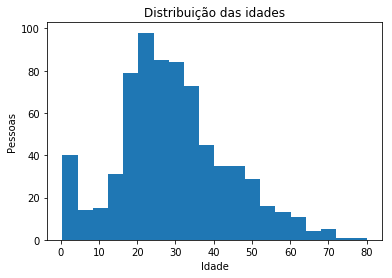

In [8]:
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')

plt.show()

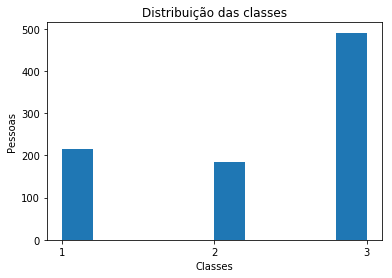

In [9]:
plt.hist(data['Classe'])
plt.title('Distribuição das classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.xticks(data['Classe'].unique())

plt.show()

### Subplots - 1ª Forma

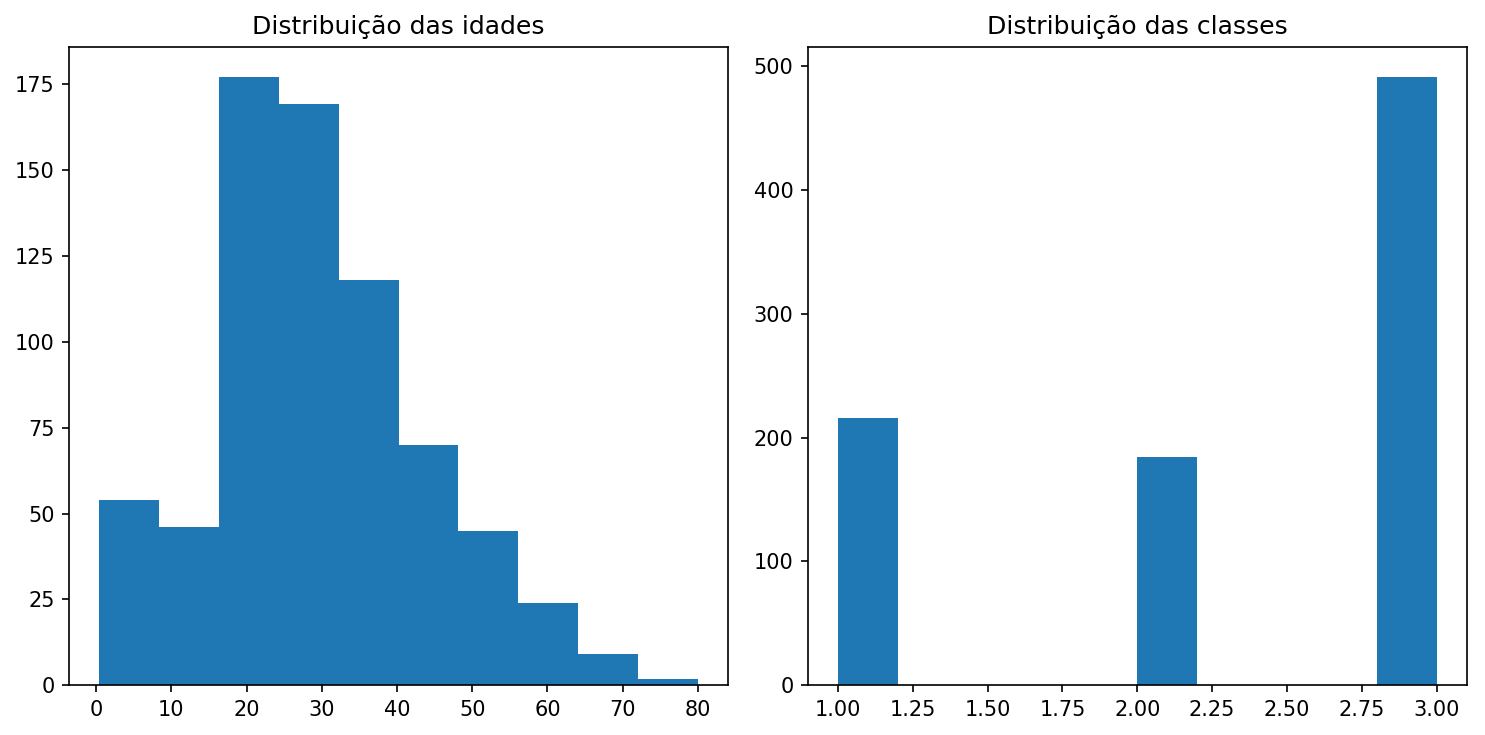

In [10]:
plt.figure(figsize=(10,5), dpi=150)

plt.subplot(1,2,1) # 1 linha, 2 colunas, me referindo ao plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das idades')

plt.subplot(1,2,2) # 1 linha, 2 colunas, me referindo ao plot 2
plt.hist(data['Classe'])
plt.title('Distribuição das classes')

plt.tight_layout()
plt.show()

### Subplots - 2ª Forma

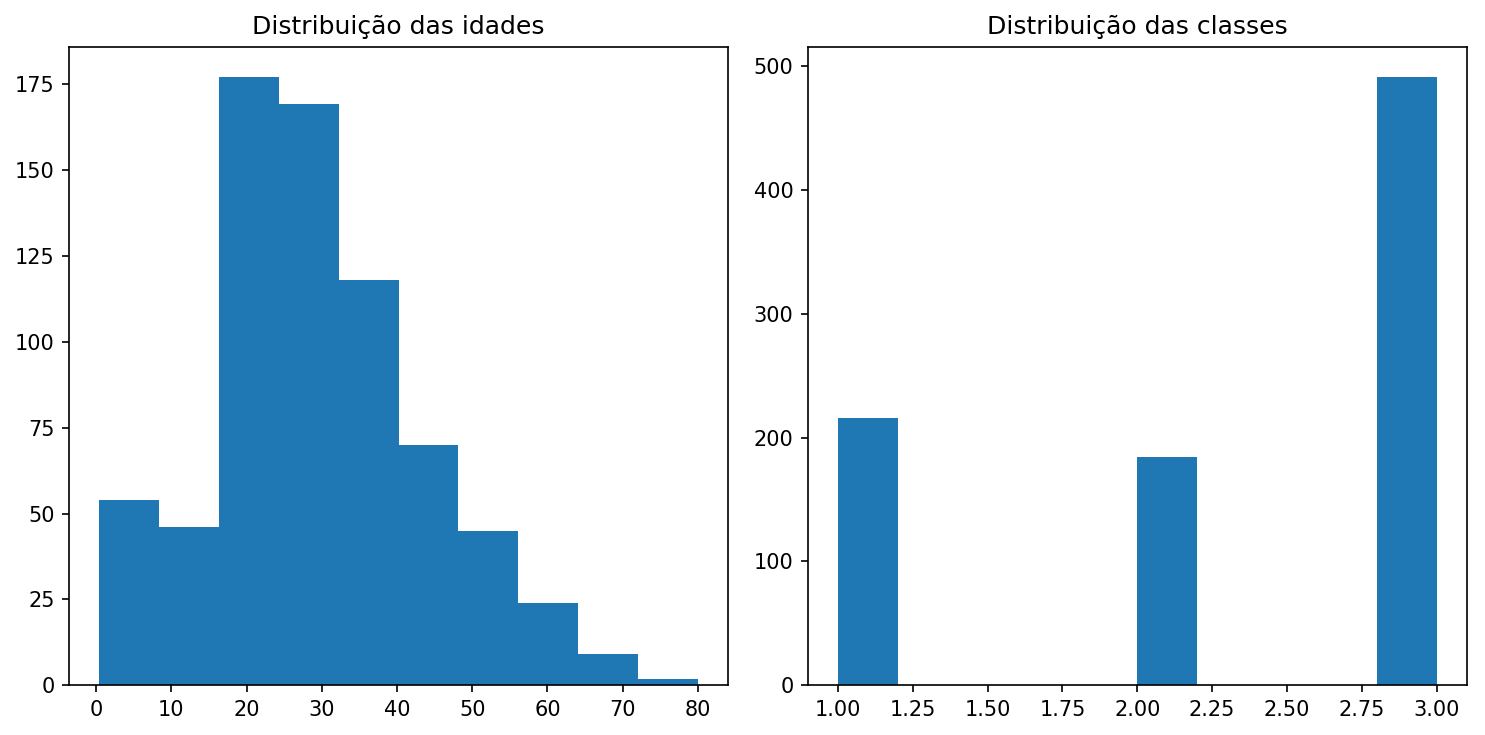

In [11]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=150) # 1 linha, 2 colunas
ax[0].hist(data['Idade'].dropna())
ax[0].set_title('Distribuição das idades')

ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição das classes')

plt.tight_layout()
plt.show()

### Seaborn

In [12]:
import seaborn as sns

In [13]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [14]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

### pie e countplot

Text(0,0.5,'')

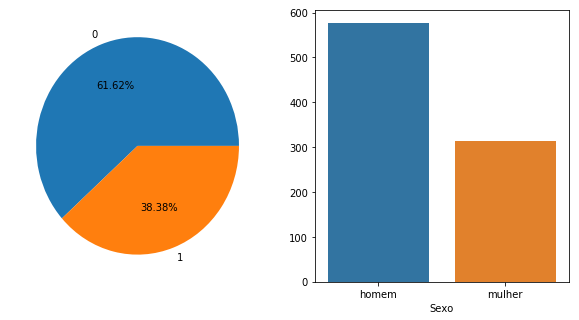

In [15]:
f, ax = plt.subplots(1,2, figsize=(10,5))

data['Sobreviveu'].value_counts().plot.pie(ax=ax[0], autopct='%0.2f%%')
ax[0].set_ylabel('')

sns.countplot('Sexo', data=data, ax=ax[1])
ax[1].set_ylabel('')

### countplot  e hue

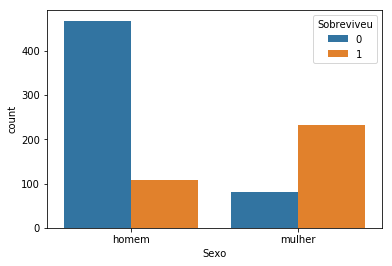

In [16]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

### boxplot

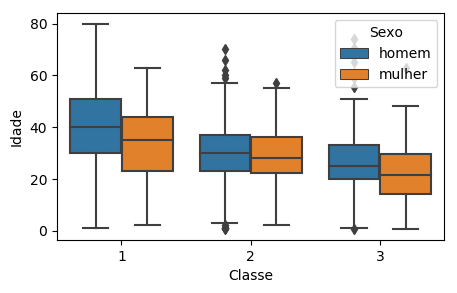

In [17]:
plt.figure(figsize=(5,3), dpi=100)

sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

### violinplot

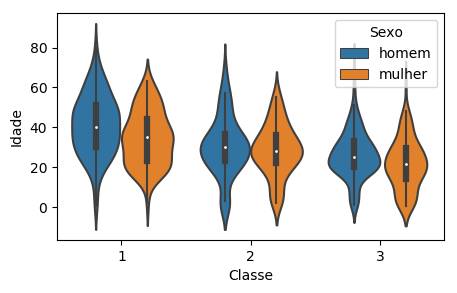

In [18]:
plt.figure(figsize=(5,3), dpi=100)

sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

### FacetGrid com hist

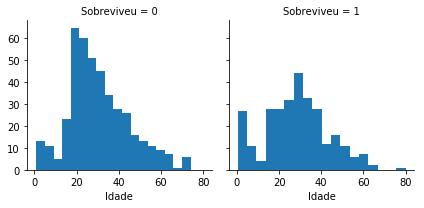

In [19]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

### FacetGrid com barplot

In [20]:
# g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
# g.map(sns.barplot, 'Sexo', 'Tarifa')

### FacetGrid com distplot

C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

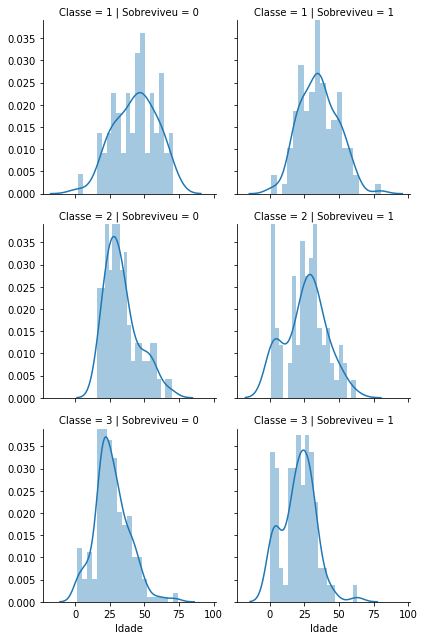

In [21]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe')
g.map(sns.distplot, 'Idade', bins=20)

### FacetGrid com pointplot

C:\Users\ricar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ricar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


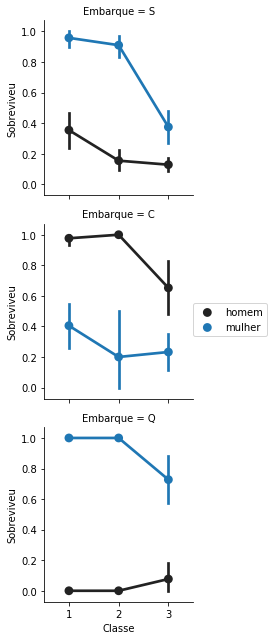

In [22]:
g = sns.FacetGrid(data, row='Embarque')
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### heatmap

In [23]:
data.isnull().sum()

IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

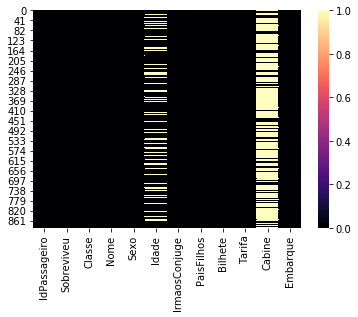

In [24]:
sns.heatmap(data.isnull(),cmap='magma')

### scatterplot

In [29]:
!pip install seaborn

  Using cached pandas-1.1.4-cp38-cp38-win_amd64.whl (8.9 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [30]:
import seaborn as sns

In [34]:
# sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', size='Idade', data=data, sizes=(10,200))

### pairplot

C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

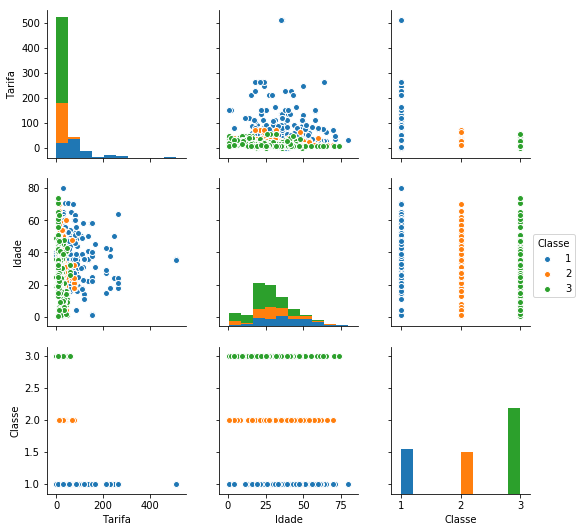

In [40]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe','Sexo', 'Embarque']].dropna(), hue='Classe')

C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

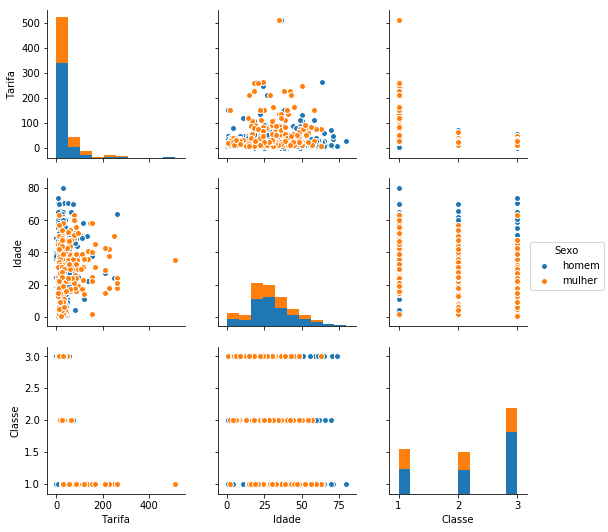

In [41]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe','Sexo', 'Embarque']].dropna(), hue='Sexo')

C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ricar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

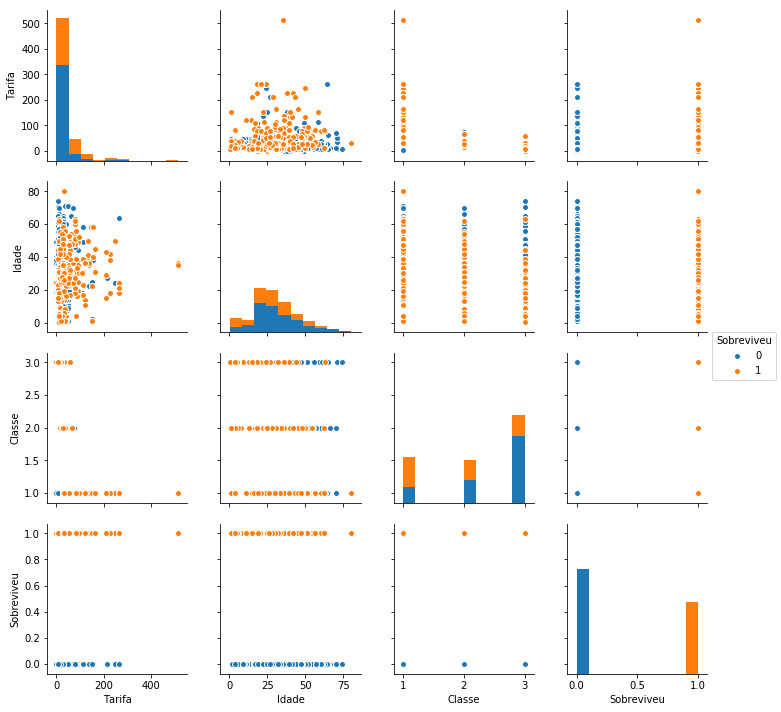

In [42]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe','Sexo', 'Sobreviveu']].dropna(), hue='Sobreviveu')

### jointplot tipo "kde"

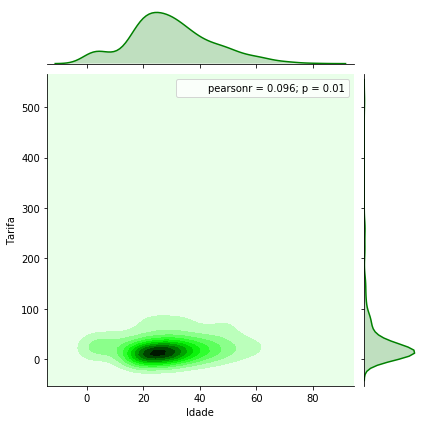

In [43]:
sns.jointplot('Idade','Tarifa',data=data, kind='kde', color='g')

### jointplot tipo "reg"

C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


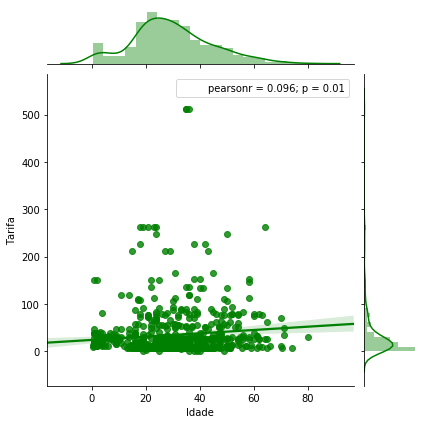

In [44]:
sns.jointplot('Idade','Tarifa',data=data, kind='reg', color='g')

### kdeplot

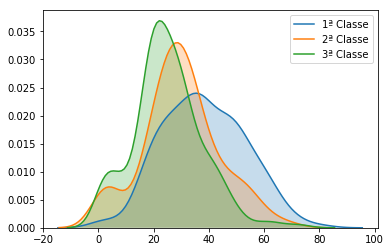

In [48]:
sns.kdeplot(data['Idade'].dropna().loc[data['Classe']==1], shade=True, label='1ª Classe')
sns.kdeplot(data['Idade'].dropna().loc[data['Classe']==2], shade=True, label='2ª Classe')
sns.kdeplot(data['Idade'].dropna().loc[data['Classe']==3], shade=True, label='3ª Classe')

### catplot do tipo "count"

In [50]:
# sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(), kind='count')

### heatmap corr()

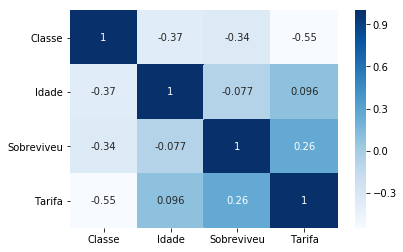

In [53]:
sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(), cmap='Blues', annot=True)

In [54]:
data = pd.get_dummies(data=data, columns=['Embarque'], drop_first=True)

In [55]:
data.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque_Q,Embarque_S
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C,0,1
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,0,1


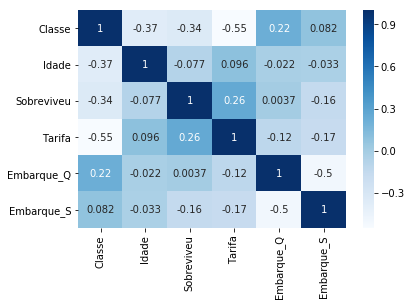

In [56]:
sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q', 'Embarque_S']].corr(), cmap='Blues', annot=True)

### plot

In [58]:
x = np.random.normal(10, 1, 15)
x

array([10.2885019 ,  8.62129257,  9.08695046, 12.46238484,  8.46074243,
        9.43417862, 11.16480874,  8.24374492,  9.26128558, 11.01145988,
        9.3401446 , 10.47889738, 11.07503599, 10.12946076,  9.87112984])

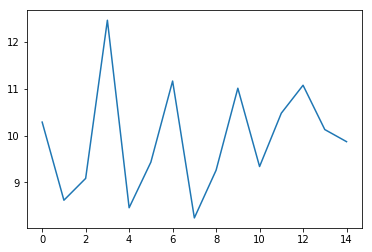

In [59]:
plt.plot(x)

### linspace

In [60]:
x = np.linspace(0, 20, 1000)
x[:15]

array([0.        , 0.02002002, 0.04004004, 0.06006006, 0.08008008,
       0.1001001 , 0.12012012, 0.14014014, 0.16016016, 0.18018018,
       0.2002002 , 0.22022022, 0.24024024, 0.26026026, 0.28028028])

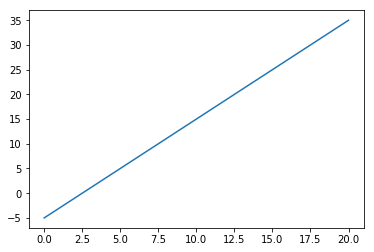

In [61]:
plt.plot(x, 2*x-5)
plt.show()

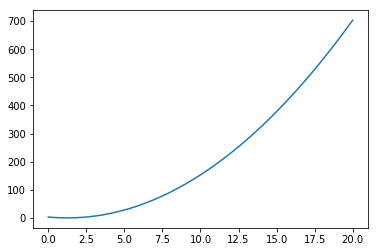

In [62]:
plt.plot(x, 2*x**2-5*x + 3)
plt.show()

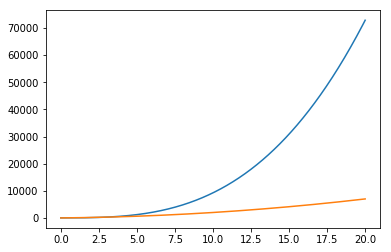

In [66]:
plt.plot(x, 9*x**3 + 2*x**2 + 3*x + 10)
plt.plot(x, 15*x**2 + 50*x - 12)
plt.show()

### normal

In [67]:
y = np.random.normal(8, 2, 1000)
y[:15]

array([ 9.30786246,  6.26944858,  8.45493685,  8.82495143,  7.47451772,
        5.64217258,  6.8276781 , 11.50926606,  9.57482325,  8.46661515,
        6.91622831,  7.49255294,  8.34721628,  8.68926093, 10.15039548])

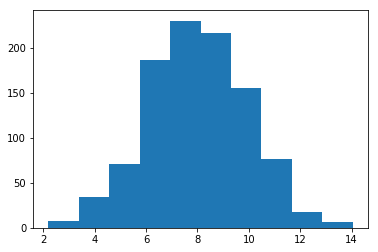

In [69]:
plt.hist(y)
plt.show()

C:\Users\ricar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


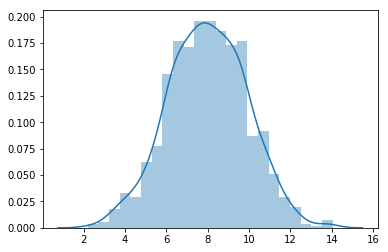

In [70]:
sns.distplot(y)
plt.show()

Fontes:
* https://matplotlib.org/gallery/index.html
* https://seaborn.pydata.org/examples/index.html
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
* https://matplotlib.org/tutorials/colors/colormaps.html